In [1]:
import time
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt

import scipy.stats as ss

In [9]:
file = r'donnee.xlsx'
df = pd.read_excel(file)
del df['Unnamed: 0']

In [14]:
temps = df['Temps'].values
s_true = df['signalReel'].values
s_noise = df['signalBruite'].values

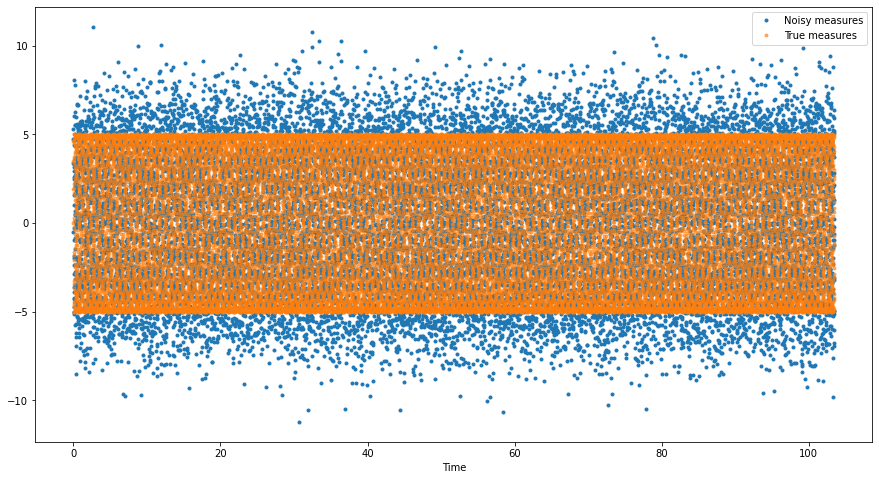

In [23]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.plot(temps, s_noise, '.', label='Noisy measures')
ax.plot(temps, s_true, '.', alpha=0.6, label='True measures')
ax.set_xlabel('Time')
ax.legend()
plt.show()

In [29]:
def Kalmann_filter(Q, R, f, F, h, H, z, x0) :
    """
    Apply the Extended Kalman filter to the measures z to estimate the state variables
    
    Args:
        Q (int): the variance of the state noise
        
        R (int): the variance of the measure noise
        
        z (array): array of measures
        
    Returns:
        array: estimated and predicted state variables
    """
    
    n = len(z)
    P0 = np.array([[1, 0], [0, 1]])
    xh, P = np.zeros(n), np.zeros(n)
    xh[0], P[0] = x0, P0 + Q
    for k in range(n) :
        # estimation
        S = H(k) @ P[k] @ H(k).T + R
        K = P[k] @ H(k).T @ la.inv(S)
        err = z[k] - h(xh[k])
        xh[k] = xh[k] + K @ err
        P[k] = P[k] - K @ H(k) @ P[p]
        if k < n - 1 :
            # prediction
            xh[k+1] = f(xh[k])
            P[k+1] = F(k) @ P[k] @ F(k).T
            
    return xh, P